In [2]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
len(train_data)

25000

In [4]:
len(train_labels)

25000

In [5]:
len(test_data)

25000

In [6]:
len(test_labels)

25000

In [7]:
len(train_data[0])

218

In [77]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [9]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])

In [10]:
decoded_review

"? big hair big boobs bad music and a giant safety pin these are the words to best describe this terrible movie i love cheesy horror movies and i've seen hundreds but this had got to be on of the worst ever made the plot is paper thin and ridiculous the acting is an abomination the script is completely laughable the best is the end showdown with the cop and how he worked out who the killer is it's just so damn terribly written the clothes are sickening and funny in equal ? the hair is big lots of boobs ? men wear those cut ? shirts that show off their ? sickening that men actually wore them and the music is just ? trash that plays over and over again in almost every scene there is trashy music boobs and ? taking away bodies and the gym still doesn't close for ? all joking aside this is a truly bad film whose only charm is to look back on the disaster that was the 80's and have a good old laugh at how bad everything was back then"

In [11]:
train_labels[1]

0

In [12]:
max([max(sequence) for sequence in train_data])

9999

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [20]:
x_train[0]# bow >>>> BAG OF WORDS 

array([0., 1., 1., ..., 0., 0., 0.])

In [21]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [57]:
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))

model.add(layers.Dense(16, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [58]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',
metrics=['accuracy'])

In [59]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [60]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=256,
validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 5s 309us/sample - loss: 0.5055 - accuracy: 0.7909 - val_loss: 0.3769 - val_accuracy: 0.8530
Epoch 2/20
15000/15000 [==============================] - 2s 156us/sample - loss: 0.2730 - accuracy: 0.9103 - val_loss: 0.2977 - val_accuracy: 0.8809
Epoch 3/20
15000/15000 [==============================] - 2s 154us/sample - loss: 0.1908 - accuracy: 0.9367 - val_loss: 0.2907 - val_accuracy: 0.8830
Epoch 4/20
15000/15000 [==============================] - 2s 159us/sample - loss: 0.1458 - accuracy: 0.9520 - val_loss: 0.2870 - val_accuracy: 0.8875
Epoch 5/20
15000/15000 [==============================] - 2s 156us/sample - loss: 0.1145 - accuracy: 0.9641 - val_loss: 0.3043 - val_accuracy: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 163us/sample - loss: 0.0926 - accuracy: 0.9719 - val_loss: 0.3361 - val_accuracy: 0.8811
Epoch 7/20
15000/15000 [==========================

In [79]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

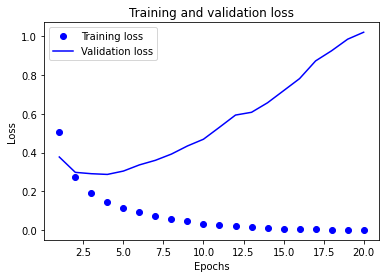

In [62]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, 21)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

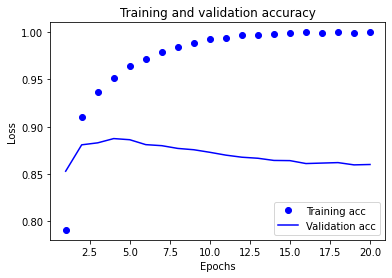

In [69]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [72]:
import pandas as pd
pd.DataFrame(history.history)

,loss,accuracy,val_loss,val_accuracy
0,0.505451,0.790933,0.376891,0.8530
1,0.272992,0.910333,0.297652,0.8809
2,0.190833,0.936667,0.290666,0.8830
3,0.145771,0.952000,0.286968,0.8875
4,0.114502,0.964067,0.304260,0.8863
5,0.092640,0.971867,0.336073,0.8811
6,0.072140,0.979200,0.359763,0.8800
7,0.057509,0.984800,0.391923,0.8771
8,0.045646,0.988600,0.433789,0.8757
9,0.033400,0.992733,0.468529,0.8730


In [73]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',
loss='binary_crossentropy',
metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)


results = model.evaluate(x_test, y_test)

Train on 25000 samples
Epoch 1/4
25000/25000 [==============================] - 4s 155us/sample - loss: 0.4443 - accuracy: 0.8264
Epoch 2/4
25000/25000 [==============================] - 2s 93us/sample - loss: 0.2585 - accuracy: 0.9080
Epoch 3/4
25000/25000 [==============================] - 2s 97us/sample - loss: 0.2007 - accuracy: 0.9304
Epoch 4/4
25000/25000 [==============================] - 5s 208us/sample - loss: 0.3066 - accuracy: 0.8791


In [74]:
results

[0.30656753414154053, 0.87908]

In [75]:
model.predict(x_test)

array([[0.15121734],
       [0.9988844 ],
       [0.6440181 ],
       ...,
       [0.09936213],
       [0.0573501 ],
       [0.45094234]], dtype=float32)

In [76]:
x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])